In [1]:
import pandas as pd
import glob
import os
import numpy as np
import re
import time
from tqdm import tqdm
from konlpy.tag import Okt
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from urllib.request import urlopen
import urllib.request as req
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from urllib.request import urlopen #url의 html 을 가져 오기 위한 패키지
from bs4 import BeautifulSoup  #크롤링 필수 패키지 설치하려면 cmd창에서 pip install bs4
import os
import re
from selenium import webdriver
from bs4 import BeautifulSoup #크롤링 도구
from selenium.webdriver.common.keys import Keys
import time
from tqdm import tqdm
import os
import re
import time
import json
import datetime
from konlpy.tag import Okt
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pylab as pl
import statsmodels.api as sm
from sklearn.cluster import DBSCAN
import sklearn as skl
import sklearn.model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import random
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from ckonlpy.tag import Twitter
import string
import glob
from pprint import pprint
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim
import warnings
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from matplotlib import font_manager, rc
from ckonlpy.tag import Postprocessor


In [17]:
d = pd.read_csv('C:/Users/USER/Desktop/고용유지지원금2.csv', encoding = 'CP949', index_col = False,header = None)
urllist = d.iloc[:,1]

In [18]:

data = pd.DataFrame(columns=['date', 'title', 'text', 'category','url'])
j = 0
for i in tqdm(urllist):
    try:
        requrl = req.Request(i, headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(requrl)
        soup = BeautifulSoup(webpage, "html.parser")
        #webpage = urlopen(i)
        #soup = BeautifulSoup(webpage, 'html.parser')

        aa = soup.select('.article_info  h3#articleTitle')
        test_name = aa[0].text  # 제목 가져오기

        aa = soup.select('.article_info .t11')
        aa[0].text[0:10]
        test_date = datetime.datetime.strptime(aa[0].text[0:10], '%Y.%m.%d')  # 날짜 가져오기

        # 본문가져오고 정제하기
        aa = soup.select('#articleBodyContents')
        te = aa[0].text.replace(soup.select('#articleBodyContents script')[0].text, "")
        trash = [i.text for i in soup.select('#articleBodyContents a')]
        for k in trash:
            te = te.replace(k, "")
        text = te.replace('\n', "").replace("  ", "").replace('\t', "").replace('무단 전재 및 재배포 금지', "")

        cate = '경제' if len(re.findall('sid1=101',i)) == 1 else '사회'
        tlist = [test_date, test_name, text, cate,i]
        data.loc[j, :] = tlist
        j = j + 1
    except:
        tlist = [0,0,0,0,0]
        data.loc[j, :] = tlist
        j = j + 1
del i; del j;  #del soup; del test_date; del test_name; del text; del tlist; del trash; del k; del cate;
#본문 전처리
data = data.drop_duplicates() #중복제거
data = data[data['text'] != 0] #0인 값 제거

  0%|                                                                                           | 0/20 [00:00<?, ?it/s]C:\Users\USER\anaconda3\lib\site-packages\bs4\element.py:1615: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if (isinstance(value, str) or isinstance(value, collections.Callable) or hasattr(value, 'match')
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.39it/s]


In [19]:
data.head()

,date,title,text,category,url
0,2019-04-02 00:00:00,"""이러다 공장 문 닫을 수도""…르노삼성차 협력업체 '이중고'",부산상의 30개사 조사…파업 장기화에 생산감소·고용유지 애로르노삼성차 노사분규[연합...,경제,https://news.naver.com/main/read.nhn?mode=LSD&...
1,2019-04-02 00:00:00,"르노삼성차 사태 장기화, 부산지역 협력업체 피해규모 ‘눈덩이’","-부산상의 조사, 물량 급감에 통상임금 40% 잔업수당 감소-일부 납품업체, 사태 ...",사회,https://news.naver.com/main/read.nhn?mode=LSD&...
2,2019-04-02 00:00:00,"르노삼성차 협력업체, 사태 장기화 우려 고용유지 빨간불","협력업체 직원, 납품물량 급감으로 통상임금 40% 달하는 잔업수당 감소로 고통부산시...",사회,https://news.naver.com/main/read.nhn?mode=LSD&...
3,2019-04-02 00:00:00,"르노삼성 부산 협력업체, 납품물량·임금 최대 40%↓ 일자리 '위태'","부산상의 지역 33개 협력업체 긴급 모니터링 결과, 업체별 15~40% 생산량 줄어...",사회,https://news.naver.com/main/read.nhn?mode=LSD&...
4,2019-04-02 00:00:00,"""이러다 공장 문 닫을 수도""…르노삼성차 협력업체 '이중고'",부산상의 30개사 조사…파업 장기화에 생산감소·고용유지 애로르노삼성차 노사분규[연합...,사회,https://news.naver.com/main/read.nhn?mode=LSD&...


In [40]:

twi = Twitter()
add_noun = ['비대면','확진자','거리두기','사랑제일교회','의료기관','의료진','집단감염','유연근무','유연근무제','유연근로제','한국판뉴딜','디지털뉴딜',
            '그린뉴딜','휴먼뉴딜','취약계층','긴급재난지원금','고용보험','진료거부','택배기사','선별진료소','고용보험','특수고용직','특고','재배포','고용유지지원금','언택트'
            '고용안정지원금','공유오피스','공용오피스','저소득층','실업급여','유통업계','물류센터','소상공인','유연근로','특수형태근로자','특수형태근로종사자']
eco_word = pd.read_excel('C:/Users/USER/Desktop/★주요키워드 및 배제어.xlsx')
eco_keyword = list(eco_word['경제키워드'])
for i in eco_keyword:
    add_noun.append(i)

#새로운 단어 등록 하기
for i in add_noun:
    twi.add_dictionary(i,'Noun')

#통합어 만들기
replace = {'유연근로제':'유연근무제','유연근무':'유연근무제','유연근로':'유연근무제','특고':'특수고용직','특수형태근로자':'특수고용직','특수형태근로종사자':'특수고용직'}
postprocessor = Postprocessor(base_tagger=twi, replace=replace, passtags={'Noun'})

#단어 등록 확인하기
postprocessor.pos('확진자와 비대면으로 거리두기를 사랑제일교회에서부터 전광훈이 사전조사 의료기관과 의료진이 집단감염이 걸려 집단감염, 재택근무하고 '
          '유연근무와 유연근무제를 하고 지역경제와 한국판뉴딜과 그린뉴딜과 디지털뉴딜을 휴면뉴딜하고 취약계층의 긴급재난지원금을 특수고용직에게'
          '고용보험을 진료거부하며 택배기사는 온라인수업으로 선별진료소로 간다 소상공인 갭투자를 계액갱신공매공매도공시가격과징금과학기술괴리율국가경쟁력국내총생산'
          '국민건강보험국민연금국제원유가격규제지역그린뉴딜그린벨트금리금리인하금융기관금융세제금융위기금융지원배달서비스배당금배터리백신보유세보이스피싱부동산부동산시장'
          '분양가분양가상한제불법사금융블록체인비상경제비상경제회의빅데이터사모펀드사이드카사회적거리두기산유국상장주식상장지수증권상장지수펀드생필품서킷브레이커선물세트선물환세금'
          '세입자셧다운소비심리소상공인손소독제수소차수출규제스마트스토어스마트팜스타트업시장심리지수신용대출신용등급신용카드신재생에너지실물경제실업자안전자산액화천연가스양도세양도소득양도소득세'
          '양도차익양적완화에너지저장시스템오픈뱅킹온라인쇼핑몰외환시장외환위기용적률우선주운전자보험원격수업원격의료원달러환율위안화 AI에서 특수형태근로종사자와 특수형태근로자와 특고')

#형태소 분석 하기
words = [[j[i][0] for i in range(len(j))] for j in [postprocessor.pos(i) for i in tqdm(list(data['text']))]]


#배제어 등록하기
Prohibit_words = ['기자','연합뉴스','뉴시스','시사저널','신문','뉴스','사진','헤럴드경제','노컷뉴스','파이낸셜뉴스','특파원',
                  '라며','대해','지난','위해','오전','오후','무단','배포','이데일리','머니투데이','앵커','지금','때문','이번',
                  '통해','정도','경우','관련','이미지','출처','일보','바로가기','까지','여개','도록','이나','재배포','처럼','면서',
                  '거나','이제','지난달','어요']
for i in list(eco_word['배제어']):
    Prohibit_words.append(i)
#배제어 제거, 한 글자 제거하기
j = 0
for i in tqdm(words):
    for k in Prohibit_words:
        while k in i:
            i.remove(k)
    words[j] = i
    j += 1 #불용어 제외

for k in range(len(words)):
    words[k] = [i for i in words[k] if len(i) > 1]  # 한글자 제외


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 29.74it/s]

100%|█████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 778.57it/s]


In [41]:
print(len(data))
print(len(words))

14
14


In [42]:
for k in range(len(words)):
    words[k] = [i for i in words[k] if len(i) > 2 or i in ['배달','택배','고용','취업','실업','채용','구직','청년','유통','해고']]  # 두글자 이하 제외
data['words'] = words

In [47]:
print(data.duplicated(['text'])) #중복제거
print(len(data))
data = data.drop_duplicates(['text'])
print(len(data))

0     False
1     False
2     False
3     False
4      True
7     False
8     False
9     False
10     True
11    False
14    False
15    False
16    False
19    False
dtype: bool
14
12


In [48]:
print([len(i) for i in tqdm(data['words'])])


100%|██████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:00<?, ?it/s]

[44, 42, 35, 31, 35, 103, 24, 75, 91, 77, 27, 33]


In [53]:

def topic(word):
    bb2 = data
    news = bb2['words']
    id2word = corpora.Dictionary(news)
    texts = news
    corpus = [id2word.doc2bow(text) for text in texts]

    def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
        coherence_values = []
        model_list = []
        for num_topics in tqdm(range(start, limit, step)):

            model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                    id2word=id2word,
                                                    num_topics=num_topics,
                                                    random_state=100,
                                                    update_every=1,
                                                    chunksize=100,
                                                    passes=10,
                                                    alpha='auto',
                                                    per_word_topics=True)
            model_list.append(model)
            coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
            coherence_values.append(coherencemodel.get_coherence())
        return model_list, coherence_values
    model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2,
                                                            limit=20, step=1)

    # Show graph
    limit = 20; start = 2; step = 1;
    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()
    print(coherence_values.index(max(coherence_values)) + 2,'개의 주제가 이상적')
    print(word)
    #주제 dataframe화 하기
    coherence_values.index(max(coherence_values))
    optimal_model = model_list[coherence_values.index(max(coherence_values))]
    topic_dic = {}
    for i in range(coherence_values.index(max(coherence_values)) + 2):
        words2 = optimal_model.show_topic(i, topn=20)
        topic_dic['topic ' + '{:02d}'.format(i + 1)] = [i[0] for i in words2]
    da = pd.DataFrame(topic_dic)
    return da



100%|██████████████████████████████████████████████████████████████████████████████████| 18/18 [02:17<00:00,  7.63s/it]


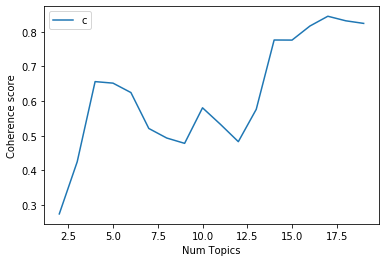

17 개의 주제가 이상적
asd


In [54]:
a = topic('asd')

In [55]:
a.to_excel('C:/Users/USER/Desktop/1~8newsurl/topicmodeling/고용유지지원금2글자제거.xlsx', header=True) 